In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
dftest = pd.read_csv('test.csv')

In [4]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


Doesn't seem like there is any missing data. 

Starting by checking out some correlations.

In [7]:
c = df.corr()

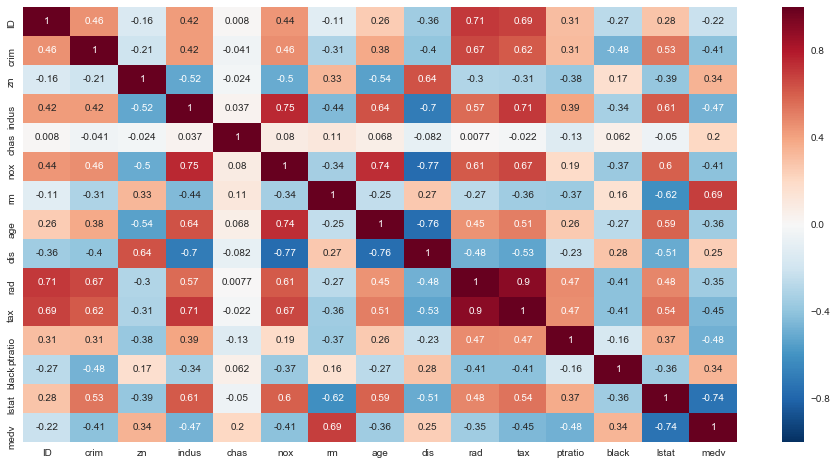

In [8]:
plt.figure(figsize=(16,8))

sns.heatmap(c, annot=True)

Average number of rooms per dwelling (rm) has a strong positive correlation with the value of homes.

LSTAT - lower status of the population (percent) - this seems to have a strong negative correlation.

High multi-co-linearity between rad (radial highways) and tax.

Same with dis and age/nox/indus


In [9]:
#1000(Bk - 0.63)^2
b=0.63
c=2

def blackvar(x):
    return 1000*(x-b)**c

In [10]:
print(blackvar(1),blackvar(0.8),blackvar(0.6),blackvar(0.4),blackvar(0.2),blackvar(1))

136.9 28.900000000000013 0.9000000000000016 52.89999999999999 184.89999999999998 136.9


# EDA

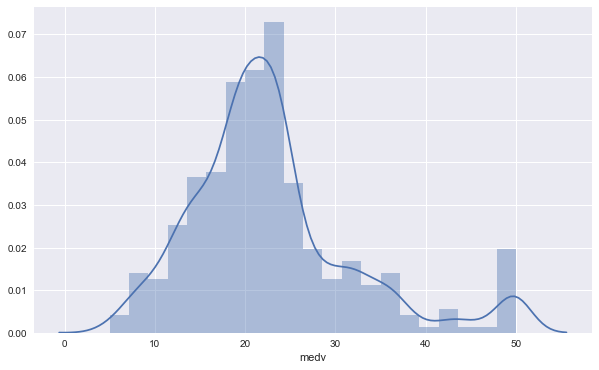

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(df['medv'])

In [25]:
print(df.columns)

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


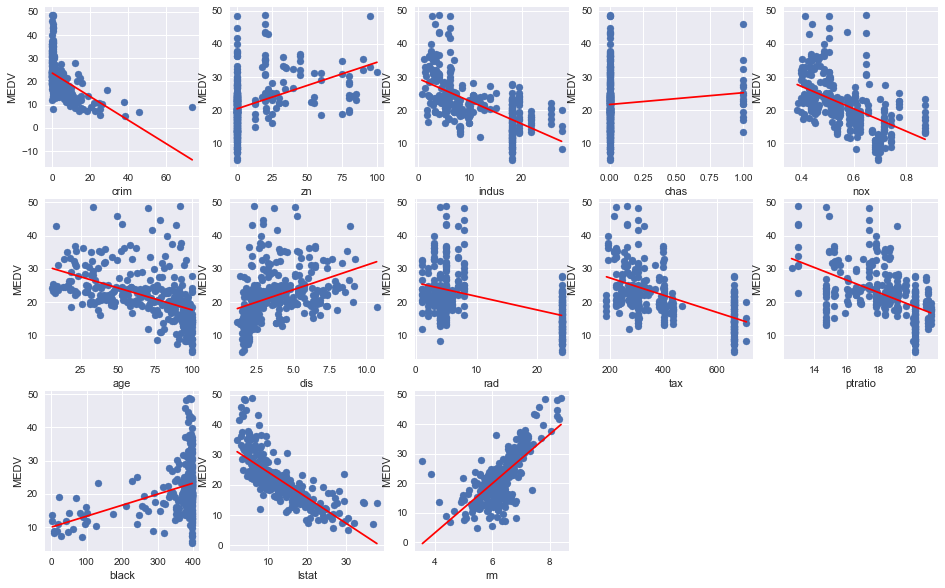

In [36]:
#checkout the two most highly correlated variables

plt.figure(figsize=(16, 10))

features = ['crim','zn','indus','chas','nox','age','dis','rad','tax','ptratio','black','lstat', 'rm']

for i, col in enumerate(features):
    #plt.subplot(1, len(features) , i+1) #rows, columns, which plot
    plt.subplot(3, 5 , i+1)   
    x = df[col]
    y = df['medv']
    plt.scatter(x, y)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red') #polyfit - least squares polynomial fit
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Looks like mainly rooms, lstat and pupil/teacher ratios have a strong relationship with house price.

In [13]:

X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat','rm'])
y = df['medv']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #mse
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse)) # Squaring the residuals, Finding the average of the residuals, Taking the square root of the result.
print('R2 score is {}'.format(r2)) #R-squared
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 7.071780814525443
R2 score is 0.5409706237046875


The model performance for testing set
--------------------------------------
RMSE is 4.91575402320702
R2 score is 0.6647356872788045


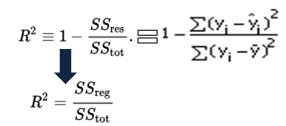

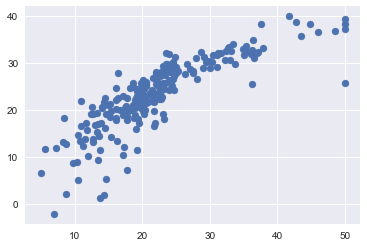

In [17]:
plt.scatter(y_test, y_test_predict)
plt.show()

In [18]:
# removing what looks like censored values
df[df['medv']==50]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
109,162,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
113,167,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
130,187,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
142,205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
154,226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
189,284,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
243,369,4.89822,0.0,18.10,0,0.6310,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
244,371,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
245,372,9.23230,0.0,18.10,0,0.6310,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0


In [19]:
df.drop(df.index[[109,110,113,130,142,154,189,243,244,245,246]],inplace=True)

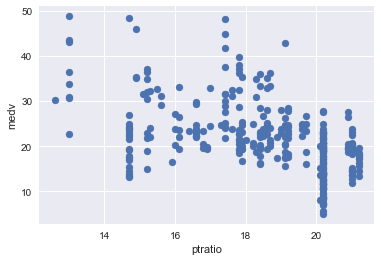

In [20]:
plt.scatter(df['ptratio'],df['medv'])
plt.xlabel('ptratio')
plt.ylabel('medv')

In [21]:
X = pd.DataFrame(np.c_[df['lstat'], df['rm'],df['ptratio']], columns = ['lstat','rm','ptratio'])
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse)) # Squaring the residuals, Finding the average of the residuals, Taking the square root of the result.
print('R2 score is {}'.format(r2)) #R-squared
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.6618631407920863
R2 score is 0.769680626441062


The model performance for testing set
--------------------------------------
RMSE is 4.392672718998911
R2 score is 0.6865675523784214


Adding the ptratio got better results, but want to check out a decision tree regressor to see if it's even better

In [22]:
X = pd.DataFrame(np.c_[df['lstat'], df['rm'],df['ptratio']], columns = ['lstat','rm','ptratio'])
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000)

rf.fit(X_train, y_train)


# model evaluation for training set
y_train_predict = rf.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse)) # Squaring the residuals, Finding the average of the residuals, Taking the square root of the result.
print('R2 score is {}'.format(r2)) #R-squared
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.365108538000143
R2 score is 0.9736624666024448


The model performance for testing set
--------------------------------------
RMSE is 4.203536057120427
R2 score is 0.6852020157933243


Much lower rmse on the training set, but only slightly better results on the test set.
Is this a sign of over fitting?

# Taking a closer look at model performance